In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import cv2 as cv
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.engine.training import Model
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,BatchNormalization,Concatenate,GlobalMaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras import regularizers
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import plot_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
seed = 72
img_size_target = 32
tf.random.set_seed(seed)

In [2]:
df = pd.read_csv("fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df1 = pd.read_csv('fashion-mnist_test.csv')
df1.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape,df1.shape

In [5]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
#check if there is null values
df.isnull().sum().sort_values(ascending=False)

label       0
pixel516    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel267    0
pixel784    0
Length: 785, dtype: int64

In [8]:
#checking if there is any duplicates
df.duplicated().sum()

43

In [9]:
#drop duplicates
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(59957, 785)

In [11]:
df.corr()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,-0.000676,0.002942,-0.010453,-0.007119,-0.004629,-0.011058,-0.036828,-0.085385,-0.161761,...,-0.362817,-0.258533,-0.183235,-0.090386,-0.077161,-0.066846,-0.018054,0.045588,0.059963,0.021773
pixel1,-0.000676,1.000000,0.297899,0.067551,0.046607,0.026630,0.026172,0.012096,0.012225,0.009644,...,-0.000641,0.004628,0.004609,0.000975,-0.002305,-0.002442,-0.000109,0.008764,0.026388,0.041581
pixel2,0.002942,0.297899,1.000000,0.575033,0.138709,0.054353,0.033184,0.022766,0.017138,0.016821,...,0.000494,0.004861,0.006817,0.002097,-0.004427,-0.002341,0.004271,0.014215,0.021296,0.022161
pixel3,-0.010453,0.067551,0.575033,1.000000,0.387468,0.118136,0.087300,0.060937,0.035942,0.029674,...,0.010095,0.016706,0.018323,0.006163,-0.003821,-0.001494,0.006861,0.013151,0.009946,0.015657
pixel4,-0.007119,0.046607,0.138709,0.387468,1.000000,0.573172,0.325683,0.242987,0.141033,0.085302,...,0.009690,0.018710,0.023391,0.016759,0.009700,0.010101,0.023940,0.012388,0.003072,0.008422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.066846,-0.002442,-0.002341,-0.001494,0.010101,0.021514,0.032318,0.027065,0.019507,0.024986,...,-0.074218,-0.008964,0.043000,0.336772,0.790184,1.000000,0.749621,0.349134,0.178656,0.073421
pixel781,-0.018054,-0.000109,0.004271,0.006861,0.023940,0.025971,0.038560,0.030478,0.026278,0.034245,...,-0.042288,0.008640,0.045504,0.131133,0.439563,0.749621,1.000000,0.645871,0.334548,0.133829
pixel782,0.045588,0.008764,0.014215,0.013151,0.012388,0.028859,0.044113,0.029461,0.022747,0.020991,...,-0.002795,0.034103,0.074004,0.092843,0.152620,0.349134,0.645871,1.000000,0.658959,0.225500
pixel783,0.059963,0.026388,0.021296,0.009946,0.003072,0.022939,0.030802,0.016128,0.005947,0.000090,...,0.001906,0.026552,0.054235,0.077767,0.101160,0.178656,0.334548,0.658959,1.000000,0.451929


C:\Users\Ahmed Mahmoud\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


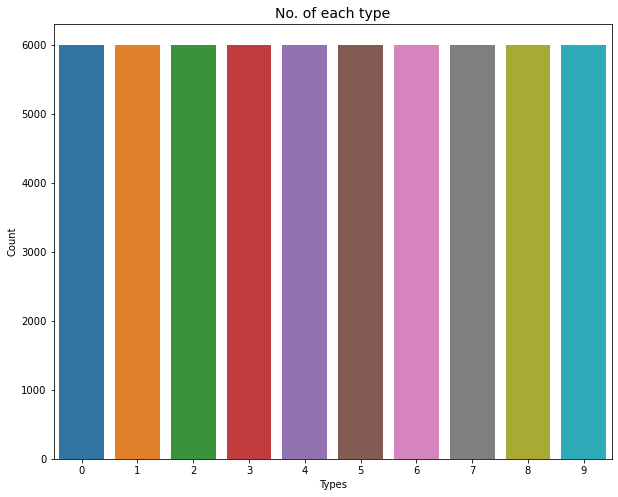

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(df['label'])
ax.set_title('No. of each type', fontsize=14)
ax.set_xlabel('Types')
ax.set_ylabel('Count')
plt.show()

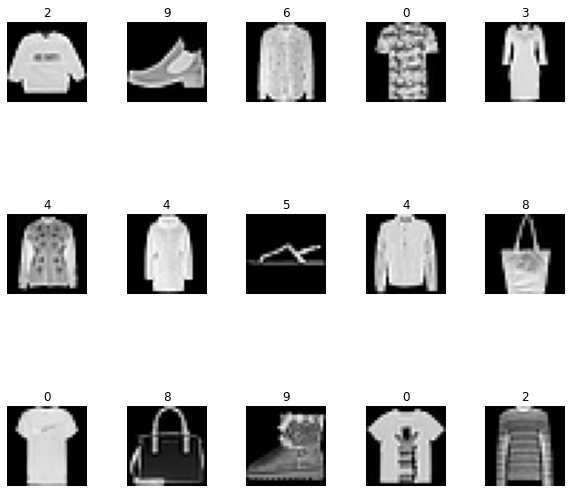

In [13]:
#first 10 images in the training set
train_images = df.iloc[:, 1:].values.reshape((-1, 28, 28))
train_labels = df.iloc[:, 0].values
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.subplots_adjust(hspace=0.2, wspace=0.5)
plt.show()

In [14]:
#convert labels to category
df['label']=df['label'].astype('category')

In [15]:
#split data to train data and target
X=df.drop(columns=['label'])
y=df['label']

In [16]:
xts = df1.drop(columns=['label'])
yts = df1['label']

In [17]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
xts = scaler.fit_transform(xts)

In [18]:
#reshape data
X=X.reshape(X.shape[0],28,28,1)
xts=xts.reshape(-1,28,28,1)

In [19]:
X.shape, xts.shape

((59957, 28, 28, 1), (10000, 28, 28, 1))

## Split train data into 80% for training and 20% for Validation

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### building lenet model

In [21]:
learningrate=1
def model_leNet(actfn="relu", lr=0.001*learningrate):
    # LeNet-5
    model = keras.Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation=actfn,kernel_regularizer=regularizers.l2(0.01), input_shape=(28, 28, 1)))
    model.add(MaxPool2D(pool_size=2,strides=2))
    model.add(keras.layers.Dropout(0.5))
    model.add(Conv2D(filters=128, kernel_size=(5,5), padding='valid', activation=actfn))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(5,5), padding='valid', activation=actfn))
    model.add(MaxPool2D(pool_size=2,strides=2))
    model.add(keras.layers.Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation=actfn))
    model.add(Dense(168, activation=actfn))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer=tf.keras.optimizers.Nadam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"), metrics=['accuracy'])
    return model

In [22]:
#build learning rate schedule function
def scheduler(epoch, lr):
   if epoch < 1:
     return lr
   else:
     return lr * tf.math.exp(-0.1)

### LeNet Model

In [23]:
early_stopping_ = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True) 
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
m=model_leNet().fit(X_train,y_train, validation_data=(X_test, y_test),epochs=25,
                                batch_size=64, callbacks=[early_stopping_, callback])

Epoch 1/25
750/750 [==============================] - 58s 75ms/step - loss: 0.5971 - accuracy: 0.7831 - val_loss: 0.4051 - val_accuracy: 0.8555 - lr: 0.0010
Epoch 2/25
750/750 [==============================] - 58s 77ms/step - loss: 0.4201 - accuracy: 0.8497 - val_loss: 0.3501 - val_accuracy: 0.8731 - lr: 9.0484e-04
Epoch 3/25
750/750 [==============================] - 60s 79ms/step - loss: 0.3818 - accuracy: 0.8625 - val_loss: 0.3287 - val_accuracy: 0.8824 - lr: 8.1873e-04
Epoch 4/25
750/750 [==============================] - 58s 77ms/step - loss: 0.3574 - accuracy: 0.8693 - val_loss: 0.3152 - val_accuracy: 0.8851 - lr: 7.4082e-04
Epoch 5/25
750/750 [==============================] - 58s 77ms/step - loss: 0.3359 - accuracy: 0.8762 - val_loss: 0.2980 - val_accuracy: 0.8938 - lr: 6.7032e-04
Epoch 6/25
750/750 [==============================] - 62s 82ms/step - loss: 0.3251 - accuracy: 0.8824 - val_loss: 0.3079 - val_accuracy: 0.8881 - lr: 6.0653e-04
Epoch 7/25
750/750 [==================

### Plotting the accuracy and the loss of the training and validation sets

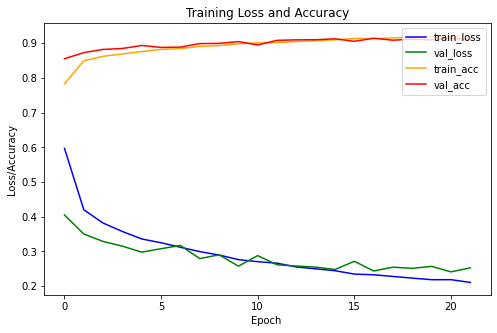

In [24]:
def plot_history(history):
    plt.figure(figsize=(8,5))
    plt.plot(history.history["loss"], label="train_loss",color='b')
    plt.plot(history.history["val_loss"], label="val_loss",color='g')
    plt.plot(history.history["accuracy"], label="train_acc", color='orange')
    plt.plot(history.history["val_accuracy"], label="val_acc",color='r')
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch ")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="upper right")
    plt.savefig("plot1.png")
plot_history(m)    

In [25]:
#evaluate model on test data
keras_cls =KerasClassifier(model_leNet, epochs=25,batch_size=64)
accuracies = cross_val_score(estimator = keras_cls, X = xts, y = yts, cv = 5, n_jobs=1, verbose=1)
mean = accuracies.mean()
print('Accuracy on test data with cross validation is:',mean)

Epoch 1/25


<ipython-input-25-42f2eaadd581>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cls =KerasClassifier(model_leNet, epochs=25,batch_size=64)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


125/125 [==============================] - 12s 77ms/step - loss: 0.9342 - accuracy: 0.6659
Epoch 2/25
125/125 [==============================] - 10s 79ms/step - loss: 0.5698 - accuracy: 0.7908
Epoch 3/25
125/125 [==============================] - 10s 77ms/step - loss: 0.5005 - accuracy: 0.8217
Epoch 4/25
125/125 [==============================] - 9s 76ms/step - loss: 0.4571 - accuracy: 0.8349
Epoch 5/25
125/125 [==============================] - 10s 79ms/step - loss: 0.4268 - accuracy: 0.8456
Epoch 6/25
125/125 [==============================] - 9s 75ms/step - loss: 0.3899 - accuracy: 0.8612
Epoch 7/25
125/125 [==============================] - 10s 76ms/step - loss: 0.3772 - accuracy: 0.8634
Epoch 8/25
125/125 [==============================] - 10s 76ms/step - loss: 0.3774 - accuracy: 0.8624
Epoch 9/25
125/125 [==============================] - 10s 76ms/step - loss: 0.3591 - accuracy: 0.8736
Epoch 10/25
125/125 [==============================] - 9s 76ms/step - loss: 0.3540 - accuracy: 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 20.2min finished


In [27]:
from keras.callbacks import ReduceLROnPlateau
reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    mode='auto',
    #epsilon=0.0001,epsilon will be removed
    min_delta =0.0001,
    cooldown=2,
    min_lr=0)

In [29]:
!pip install pydot
vgg19_model = VGG19_builder()
plot_model(vgg19_model, show_shapes=True, show_layer_names=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [39]:
#we need 3 channel (instead of 1)
x_train_ = np.repeat(X_train, 3, axis=-1)
x_test_ = np.repeat(X_test, 3, axis=-1)
tes = np.repeat(xts, 3, axis=-1)

# resize the input shape , i.e. old shape: 28, new shape: 32
x_train_ = tf.image.resize(x_train_, [32,32])
x_test_ = tf.image.resize(x_test_, [32,32])
tes = tf.image.resize(tes, [32,32])

print(x_train_.shape,x_test_.shape,tes.shape)

(47965, 32, 32, 3) (11992, 32, 32, 3) (10000, 32, 32, 3)


### ResNet50 Model

In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50
# ResNet50
base_model = ResNet50(include_top=False,input_shape=(32,32,3))

x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(100, activation="relu",kernel_initializer='he_uniform')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation="softmax")(x)
base_model = Model(base_model.input, x, name="base_model")
base_model.compile(optimizer=Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

94765736/94765736 [==============================] - 71s 1us/step


In [41]:
from keras.callbacks import ReduceLROnPlateau
reduce_learning = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

In [42]:
history= base_model.fit(x_train_, y_train, epochs=100,verbose=1,validation_data=(x_test_, y_test),
                        batch_size=256, callbacks=[early_stopping_, reduce_learning])

Epoch 1/100
188/188 [==============================] - 951s 5s/step - loss: 1.3465 - accuracy: 0.6170 - val_loss: 6.2929 - val_accuracy: 0.0989 - lr: 1.0000e-04
Epoch 2/100
188/188 [==============================] - 1013s 5s/step - loss: 0.4789 - accuracy: 0.8435 - val_loss: 6.1575 - val_accuracy: 0.1006 - lr: 1.0000e-04
Epoch 3/100
188/188 [==============================] - 1150s 6s/step - loss: 0.3519 - accuracy: 0.8862 - val_loss: 2.4143 - val_accuracy: 0.1852 - lr: 1.0000e-04
Epoch 4/100
188/188 [==============================] - 1122s 6s/step - loss: 0.2821 - accuracy: 0.9082 - val_loss: 1.4222 - val_accuracy: 0.5048 - lr: 1.0000e-04
Epoch 5/100
188/188 [==============================] - 1113s 6s/step - loss: 0.2307 - accuracy: 0.9256 - val_loss: 0.9810 - val_accuracy: 0.7202 - lr: 1.0000e-04
Epoch 6/100
188/188 [==============================] - 1183s 6s/step - loss: 0.1978 - accuracy: 0.9361 - val_loss: 0.7375 - val_accuracy: 0.7964 - lr: 1.0000e-04
Epoch 7/100
188/188 [========

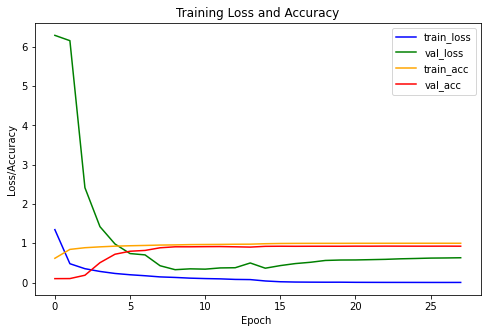

In [43]:
plot_history(history)

In [45]:
evaluation = base_model.evaluate(tes, yts)
train_acc = np.max(history.history['accuracy'])
val_acc = np.max(history.history['val_accuracy'])
test_acc = evaluation[1]
print("training datasets accuracy is " , f'{train_acc * 100:.2f}%')
print("validation datasets accuracy is " , f'{val_acc * 100:.2f}%')
print("test datasets accuracy is " , f'{test_acc * 100:.2f}%')

313/313 [==============================] - 19s 61ms/step - loss: 0.5728 - accuracy: 0.9285
training datasets accuracy is  99.96%
validation datasets accuracy is  92.70%
test datasets accuracy is  92.85%


### VGG Model

In [46]:
from tensorflow.keras.applications import VGG16,ResNet50
from keras.layers import Lambda, Input
vgg16=VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

In [47]:
model=Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
h=model.fit(x_train_,y_train,epochs=25,batch_size=128,callbacks=[reduce_learning,early_stopping_],
            validation_data=(x_test_,y_test),verbose=1)

Epoch 1/25
375/375 [==============================] - 824s 2s/step - loss: 0.3977 - accuracy: 0.8580 - val_loss: 0.2646 - val_accuracy: 0.9046 - lr: 1.0000e-04
Epoch 2/25
375/375 [==============================] - 876s 2s/step - loss: 0.2468 - accuracy: 0.9114 - val_loss: 0.2746 - val_accuracy: 0.8949 - lr: 1.0000e-04
Epoch 3/25
375/375 [==============================] - 1241s 3s/step - loss: 0.2060 - accuracy: 0.9260 - val_loss: 0.2309 - val_accuracy: 0.9159 - lr: 1.0000e-04
Epoch 4/25
375/375 [==============================] - 937s 2s/step - loss: 0.1774 - accuracy: 0.9365 - val_loss: 0.2064 - val_accuracy: 0.9249 - lr: 1.0000e-04
Epoch 5/25
375/375 [==============================] - 883s 2s/step - loss: 0.1530 - accuracy: 0.9442 - val_loss: 0.2019 - val_accuracy: 0.9307 - lr: 1.0000e-04
Epoch 6/25
375/375 [==============================] - 864s 2s/step - loss: 0.1343 - accuracy: 0.9522 - val_loss: 0.2211 - val_accuracy: 0.9239 - lr: 1.0000e-04
Epoch 7/25
375/375 [===================

In [49]:
evaluation = model.evaluate(tes, yts)
test_acc = evaluation[1]
print("test datasets accuracy is " , f'{test_acc * 100:.2f}%')

313/313 [==============================] - 17s 55ms/step - loss: 0.2331 - accuracy: 0.9407
test datasets accuracy is  94.07%


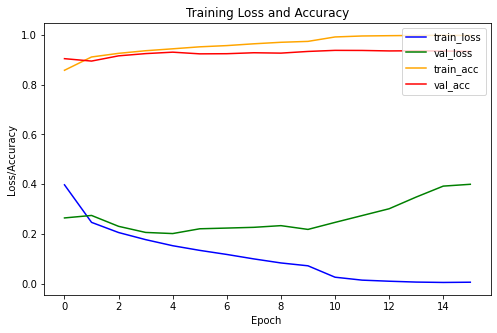

In [52]:
plot_history(h)